# House Prices Classification

This project is based on the popular "House Prices" competition from Kaggle. The goal of this competition is to predict the sales price of each house. However, in this specific project, we are going to do something a bit different. Instead of predicting the actual sales price, we will classify houses into one of ten different price groups. The groups are created by dividing the price range of the houses into ten equal parts, this is being done because of 1) to explore the concept of "Classification" in ML, 2) for us to make a better linear regression. The EDA was done in part 1 of 3, and the linear regression is being done in part 3.

The data set we are using contains 79 explanatory variables that describe almost every aspect of residential homes in Ames, Iowa. Our task is to leverage this data to build a model that can accurately classify new houses into the correct price group.

This project will include data preprocessing, feature selection, model selection, and model evaluation. We will be using Python and various popular data science libraries, including pandas, numpy, scikit-learn, and more.

Let's get started!


We start off by importing the necessary packages and modules for our task. This includes packages for data handling and manipulation (`numpy` and `pandas`), machine learning model building and evaluation (`sklearn`), and data pre-processing (`sklearn.preprocessing`). Also, some packages for visualization (`seaborn` and `matplotlib`).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


Next, we load our dataset and perform some basic pre-processing. For simplicity, we only select numeric columns for this analysis and drop any rows with missing data. Pre-processing is an important step as it prepares our data for the machine learning model. There are more sophisticated pre-processing techniques available if needed, this is a simple example.


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
# For simplicity, we will use only numeric columns
df = df.select_dtypes(include=[np.number])
df = df.dropna()

Our task is to predict the price class of a house, so we need to create these classes. We decide to create 10 classes based on the house prices. We use pandas `qcut` function, which divides the data into equal-sized bins. This ensures each class has roughly the same number of houses.


In [4]:
# Create price categories (10 equal-sized bins)
df['SalePrice'] = pd.qcut(df['SalePrice'], q=10, labels=False)

We split our data into a training set and a testing set. The training set is used to train our model, while the testing set is used to evaluate the model's performance. This helps us understand how well our model can generalize to new, unseen data.

In [5]:
# Define the predictors and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We use the RandomForestClassifier as our model. This is an ensemble learning method that operates by constructing multiple decision trees at training time and outputting the class that is the mode of the classes of the individual trees. To make our process more efficient and to prevent data leakage, we use a Pipeline. This allows us to bundle our pre-processing (scaling the data) and model training steps together.

In [6]:
# Define the steps in the pipeline
steps = [('scaler', StandardScaler()),
         ('rf', RandomForestClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: rf_scaled
rf_scaled = pipeline.fit(X_train, y_train)

Finally, we evaluate the performance of our model on the test set. We compute the accuracy of the model (the proportion of correct predictions) and use cross-validation to get a better estimate of the model's performance. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. Additionally, we also print a classification report which provides a more detailed analysis of the performance, including precision, recall, and f-score.

In [7]:
# Predict the labels of the test set
y_pred = rf_scaled.predict(X_test)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(rf_scaled.score(X_test, y_test)))

# Use cross_val_score
cross_val_scores = cross_val_score(pipeline, X, y, cv=5)

print("Average Cross-Validation Score: {}".format(np.mean(cross_val_scores)))

Accuracy with Scaling: 0.4533333333333333
Average Cross-Validation Score: 0.48532142857142857


A confusion matrix is a table that is used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It is a simple yet very effective way to measure the accuracy of a classifier.

The confusion matrix not only gives us the error rates, but also shows the ways in which our model is confused when it makes predictions.

Each row in the matrix represents the instances of the actual class while each column represents the instances of the predicted class.

The conclusion here is that, even the model not being very precise (only 44% accuracy), the most common kind of mistake is classifing the house 1 group below or above the right class.


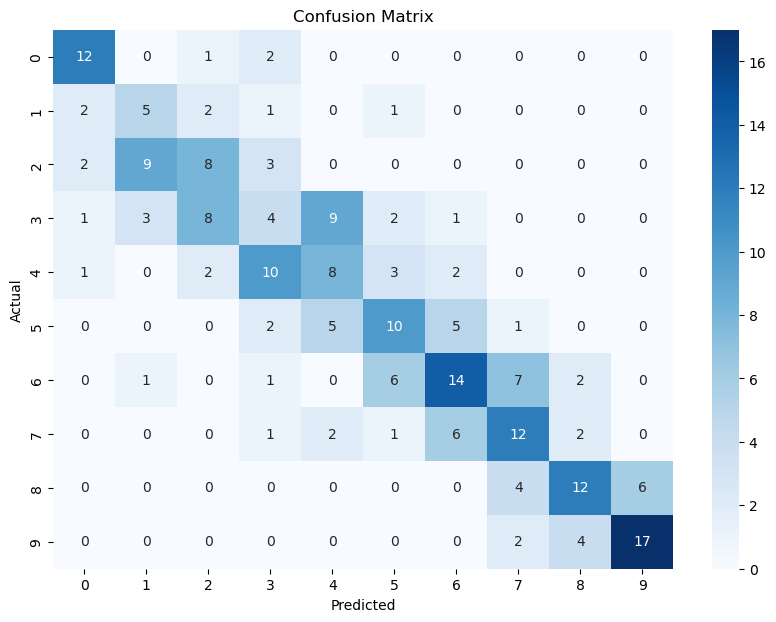

In [8]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert cm into a DataFrame
cm_df = pd.DataFrame(cm)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The Classification report is another way to evaluate the classification model performance. It displays the precision, recall, F1 and support scores for the model. 

- Precision score means the level of preciseness or certainty in our model while making predictions. 
- Recall means the amount of the total relevant results correctly classified by our algorithm.
- F1 Score is the weighted average of Precision and Recall. 
- Support is the number of actual occurrences of the class in the specified dataset. 


In [9]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.28      0.45      0.34        11
           2       0.38      0.36      0.37        22
           3       0.17      0.14      0.15        28
           4       0.33      0.31      0.32        26
           5       0.43      0.43      0.43        23
           6       0.50      0.45      0.47        31
           7       0.46      0.50      0.48        24
           8       0.60      0.55      0.57        22
           9       0.74      0.74      0.74        23

    accuracy                           0.45       225
   macro avg       0.46      0.47      0.46       225
weighted avg       0.45      0.45      0.45       225



Now, we are going to make price predictions based on each class, this is being done in "Regression Project (House prices competition 3 of 3)"